<a href="https://colab.research.google.com/github/hogitayden/Linear-Regression/blob/master/Predict_Loan_Pay_Off_Giang.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Nhập dữ liệu, clean data

In [1]:
import pandas as pd 

In [37]:
df = pd.read_csv('https://raw.githubusercontent.com/maxtran1997gmail/Files/main/loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


Bỏ 2 cột đầu tiên do không sử dụngdụng

In [38]:
col = [0,1]
df.drop(df.columns[col], axis=1, inplace = True)
df

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male
...,...,...,...,...,...,...,...,...
341,COLLECTION,800,15,9/11/2016,9/25/2016,32,High School or Below,male
342,COLLECTION,1000,30,9/11/2016,10/10/2016,25,High School or Below,male
343,COLLECTION,800,15,9/12/2016,9/26/2016,39,college,male
344,COLLECTION,1000,30,9/12/2016,11/10/2016,28,college,male


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   loan_status     346 non-null    object
 1   Principal       346 non-null    int64 
 2   terms           346 non-null    int64 
 3   effective_date  346 non-null    object
 4   due_date        346 non-null    object
 5   age             346 non-null    int64 
 6   education       346 non-null    object
 7   Gender          346 non-null    object
dtypes: int64(3), object(5)
memory usage: 21.8+ KB


In [40]:
df.describe()

,Principal,terms,age
count,346.000000,346.000000,346.000000
mean,943.641618,22.653179,30.939306
std,109.425530,7.991006,6.039418
min,300.000000,7.000000,18.000000
25%,900.000000,15.000000,27.000000
50%,1000.000000,30.000000,30.000000
75%,1000.000000,30.000000,35.000000
max,1000.000000,30.000000,51.000000


Nhận xét: 
- Cột effective_date và due_date chưa ở dạng ngày
Đổi định dạng cột và tính thời hạn trả nợ (tính từ effective date đến due date)

In [41]:
df['effective_date'] = pd.to_datetime(df['effective_date'])
df['due_date'] = pd.to_datetime(df['due_date'])
df['due_time'] = (df['due_date'] - df['effective_date']).dt.days
df.drop(columns = ['effective_date','due_date'], inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   loan_status  346 non-null    object
 1   Principal    346 non-null    int64 
 2   terms        346 non-null    int64 
 3   age          346 non-null    int64 
 4   education    346 non-null    object
 5   Gender       346 non-null    object
 6   due_time     346 non-null    int64 
dtypes: int64(4), object(3)
memory usage: 19.0+ KB


#2. Explore data

Lấy thông tin loan_status, education

In [42]:
df.loan_status.unique().tolist()

['PAIDOFF', 'COLLECTION']

In [43]:
df.education.unique().tolist()

['High School or Below', 'Bechalor', 'college', 'Master or Above']

**Xét tỉ lệ trả hết nợ của 2 giới tính**

In [44]:
df.Gender.value_counts(normalize=True)

male      0.849711
female    0.150289
Name: Gender, dtype: float64

In [45]:
df.groupby(['Gender']).loan_status.value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

Nhận xét: nam giới chiếm 85% tổng số khách hàng (gấp 5.6 lần nữa giới) nhưng tỉ lệ trả nợ đầy đủ chỉ bằng 85% so với nữ (73% so với 86%), cho thấy xu hướng nữ giới trả nợ đầy đủ nhiều hơn nam giới.

Đổi "nam, nữ" thành "0, 1"

In [46]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)

**Tương tự, xét khả năng trả nợ theo học vấn**

In [47]:
df.education.value_counts(normalize=True)

High School or Below    0.436416
college                 0.430636
Bechalor                0.127168
Master or Above         0.005780
Name: education, dtype: float64

In [48]:
df.groupby(['education']).loan_status.value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

Tỉ lệ trả nợ ở bậc Bechalor, High scholl or below, college tương đồng nhau, đều ở mức 75% hoàn thành đầy đủ và 25% vẫn trong collection. Riêng bậc Master tỉ lệ là 50:50. Bậc học Master người vay tự chủ tài chính nên thời gian trả nợ lâu hơn, các bậc dưới có sự hỗ trợ từ gia đình nên trả nợ sớm hơn.

In [49]:
df['education'] = df['education'].replace(['High School or Below', 'Bechalor', 'college', 'Master or Above'],[1,2,3,4])

In [50]:
df['loan_status'] = df['loan_status'].replace(['PAIDOFF', 'COLLECTION'],[0,1])

#3. Modelling

Lấy ra các cột thông tin

In [51]:
features_col = ['Principal', 'terms', 'age', 'education', 'Gender', 'due_time']

In [52]:
X = df[features_col]

Nhập thư viện, chuẩn hóa X

In [54]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X)
scaler

StandardScaler()

In [55]:
X_scaled = scaler.transform(X)
X_scaled

array([[ 0.51578458,  0.92071769,  2.33152555, -1.06604119, -0.42056004,
         0.53257725],
       [ 0.51578458,  0.92071769,  0.34170148, -0.00612667,  2.37778177,
         0.53257725],
       [ 0.51578458, -0.95911111, -0.65321055,  1.05378785, -0.42056004,
        -0.88417105],
       ...,
       [-1.31458942, -0.95911111,  1.33661351,  1.05378785, -0.42056004,
        -0.88417105],
       [ 0.51578458,  0.92071769, -0.48739188,  1.05378785, -0.42056004,
         3.36607386],
       [ 0.51578458,  0.92071769, -0.81902922,  1.05378785, -0.42056004,
         0.53257725]])

In [57]:
y = df['loan_status']

Chia X, y thành tập test và train

In [59]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

**Chạy mô hình logisticReg**

In [60]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='lbfgs', max_iter=1000)

In [61]:
lr = logreg.fit(X_train,y_train)

In [62]:
y_pred=logreg.predict(X_test)
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [66]:
lr.score(X_test,y_test)

0.7931034482758621

In [67]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[69,  0],
       [18,  0]])

In [68]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 257.44, 'Predicted label')

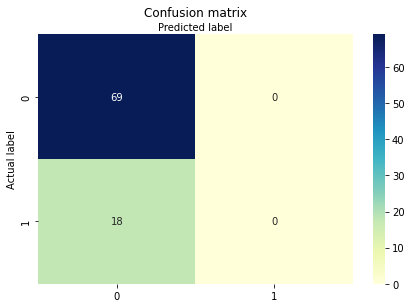

In [69]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')